In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/NEWeather/data_imputation_classification.csv"
df_f = pd.read_csv(path)
df_f.head()
df_f.reset_index(drop=True)
df_f['percentage'] = 100 - df_f['percentage']
df_f

,percentage,outlier,imputation,r2
0,100,none,none,0.782357
1,100,none,none,0.783273
2,100,none,none,0.784418
3,100,none,none,0.783903
4,90,none,none,0.774572
...,...,...,...,...
199,50,none,none,0.765127
200,50,none,drop,0.775872
201,50,none,LOCF,0.772798
202,50,none,mean,0.765928


In [3]:
df_f_grouped = df_f.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_f_grouped)

                       percentage        r2
outlier imputation                         
none    interpolation   70.000000  0.776481
        drop            70.000000  0.776463
        LOCF            70.000000  0.775872
        mean            70.000000  0.772659
        none            72.727273  0.770800


In [4]:
top_performance = df_f[df_f['percentage']==100]['r2'].mean()
top_performance

0.783487892838743

In [5]:
df_f['percent_diff'] = (((df_f['r2'] - top_performance) / top_performance) * 100).round(2)
df_f

,percentage,outlier,imputation,r2,percent_diff
0,100,none,none,0.782357,-0.14
1,100,none,none,0.783273,-0.03
2,100,none,none,0.784418,0.12
3,100,none,none,0.783903,0.05
4,90,none,none,0.774572,-1.14
...,...,...,...,...,...
199,50,none,none,0.765127,-2.34
200,50,none,drop,0.775872,-0.97
201,50,none,LOCF,0.772798,-1.36
202,50,none,mean,0.765928,-2.24


In [6]:
tabella = df_f.groupby(['outlier','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','imputation'],ascending=False).to_csv("1_c.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("1_c_n.csv")

In [7]:
df_f_none = df_f[(df_f['imputation'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_none

,percentage,r2,percent_diff
0,50,0.763016,-2.612500e+00
1,60,0.767259,-2.071250e+00
2,70,0.768361,-1.930000e+00
3,80,0.772705,-1.375000e+00
4,90,0.776318,-9.137500e-01
5,100,0.783488,-3.469447e-18


In [8]:
df_f_drop = df_f[(df_f['imputation'] == 'drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_drop

,percentage,r2,percent_diff
0,50,0.774831,-1.10500
1,60,0.774471,-1.15250
2,70,0.774707,-1.12000
3,80,0.779821,-0.47000
4,90,0.778483,-0.63875


In [9]:
df_f_locf = df_f[(df_f['imputation'] == 'LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_locf

,percentage,r2,percent_diff
0,50,0.771266,-1.56000
1,60,0.773255,-1.30750
2,70,0.775917,-0.96625
3,80,0.778400,-0.64875
4,90,0.780518,-0.37750


In [10]:
df_f_mean = df_f[(df_f['imputation'] == 'mean')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_mean

,percentage,r2,percent_diff
0,50,0.767195,-2.08000
1,60,0.769907,-1.73375
2,70,0.771789,-1.49250
3,80,0.776161,-0.93625
4,90,0.778243,-0.67000


In [11]:
df_f_int = df_f[(df_f['imputation'] == 'interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_int

,percentage,r2,percent_diff
0,50,0.772361,-1.42000
1,60,0.774687,-1.12375
2,70,0.777585,-0.75250
3,80,0.778050,-0.69375
4,90,0.779724,-0.48000


[]

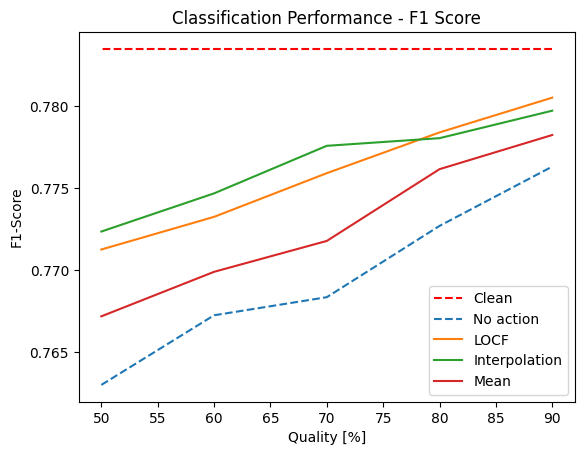

In [14]:
perc = [90,80,70,60,50]
#plt.ylim(0.7,0.8)
plt.plot(perc, [df_f_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_f_none['percentage'].iloc[:-1],df_f_none['r2'].iloc[:-1], '--', label='No action')
#plt.plot(df_f_drop['percentage'],df_f_drop['r2'], label='drop')
plt.plot(df_f_locf['percentage'],df_f_locf['r2'], label='LOCF')
plt.plot(df_f_int['percentage'],df_f_int['r2'], label='Interpolation')
plt.plot(df_f_mean['percentage'],df_f_mean['r2'], label='Mean')
plt.title("Classification Performance - F1 Score")
plt.ylabel("F1-Score")
plt.xlabel("Quality [%]")
plt.legend()
plt.plot()

[]

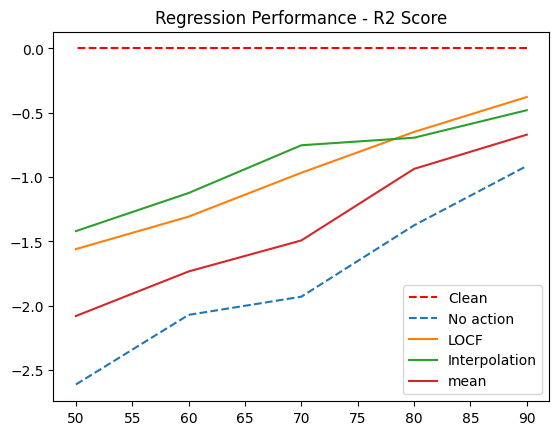

In [13]:
perc = [90,80,70,60,50]
#plt.ylim(0.7,0.8)
plt.plot(perc, [df_f_none['percent_diff'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_f_none['percentage'].iloc[:-1],df_f_none['percent_diff'].iloc[:-1], '--', label='No action')
#plt.plot(df_f_drop['percentage'],df_f_drop['percent_diff'], label='drop')
plt.plot(df_f_locf['percentage'],df_f_locf['percent_diff'], label='LOCF')
plt.plot(df_f_int['percentage'],df_f_int['percent_diff'], label='Interpolation')
plt.plot(df_f_mean['percentage'],df_f_mean['percent_diff'], label='mean')
plt.title("Regression Performance - R2 Score")
plt.legend()
plt.plot()